环境配置见environment.txt

如果第一个cell运行之后，报了ModuleNotFoundError，检查右上角的ipykernel是否和左下角环境配置中的环境一致。e.g.左下角环境是ja_nlp_python37，则右上角的的ipykernel需要是该环境下的ipykernel

#### english text preprocessing

In [2]:
import os
print(os.getcwd())

c:\Users\zhouy217\OneDrive - Pfizer\Documents\data_pipeline\notebook


In [1]:
import sys
sys.path.insert(0, 'c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\app')
 
import utils as U
import text_mining_preprocess_0712

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhouy217\AppData\Local\Temp\1\jieba.cache
Loading model cost 2.265 seconds.
Prefix dict has been built successfully.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhouy217\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zhouy217\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
from text_mining_preprocess_0712 import read_file_as_dataframe
en_df=read_file_as_dataframe("c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\data\\en_test.xlsx",col_list=[0],name_list=['sentence'],file_header=None,IFna='no')
en_df.head(5)

,sentence
0,I enjoyd the event which took place yesteday &...
2,The link to the show is http://t.co/4ftYom0i I...
3,"Best of all, NLTK is a free, open source, comm..."
4,"NLTK has been called ""a wonderful tool for tea..."
5,Please switch to 3D View


In [33]:
language_outcome=text_mining_preprocess_0712.TextMiningPreprocess(en_df).language_detection()
language_outcome

'en'

In [4]:
from text_mining_preprocess_0712 import TextMiningPreprocess
en_text_mining=TextMiningPreprocess(en_df)
en_SentenceList=en_text_mining.create_SentenceList()
en_SentenceList[0:5]

['I enjoyd the event which took place yesteday & I lovdddd itttt ! ',
 "The link to the show is http://t.co/4ftYom0i It's awesome you'll luv it #HadFun #Enjoyed BFN GN",
 'Best of all, NLTK is a free, open source, community-driven project.',
 'NLTK has been called "a wonderful tool for teaching, and working in, computational linguistics using Python," and "an amazing library to play with natural language."',
 'Please switch to 3D View']

In [5]:
from text_mining_preprocess_0712 import TextMiningPreprocess
en_WordList_in_SentenceList=en_text_mining.english_text_cleaning()
en_WordList_in_SentenceList[8:12]
#en_WordList_in_SentenceList是经过了text cleaning(包括去停用词，去标点符号等)的词语列表（2d）

[['switch', 'ac', 'please'],
 ['help', 'open', 'ac'],
 ['ac', 'please'],
 ['wanna', 'activate', 'ac']]

In [17]:
en_word_list = en_text_mining.flatten_list()
en_concat_sentence_text = en_text_mining.concat_sentence()

In [18]:
# en_word_list
# en_concat_sentence_text

#### english text statistical analysis

In [19]:
from text_mining_statistics import Statictics
en_statistics=Statictics(en_df)
en_one_word_cnt_dict,en_one_word_cnt_df=en_statistics.one_word_freq(en_WordList_in_SentenceList)

In [20]:
# en_one_word_cnt_dict
# en_one_word_cnt_df

In [21]:
# U.sort_dict_by_value(en_one_word_cnt_dict) #按照词频排序（字典里是词语和对应词频）

In [22]:
en_part_of_speech_df = en_statistics.part_of_speech_dataframe('en',en_word_list)
# en_part_of_speech_df.head(3)

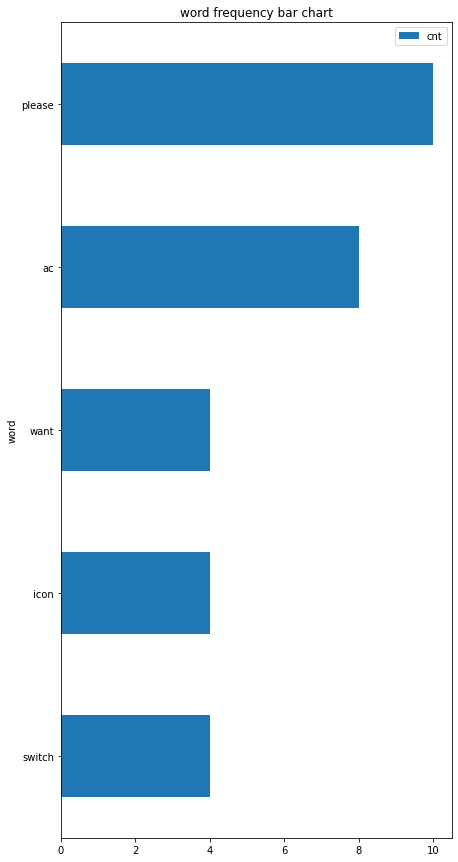

In [23]:
en_statistics.barh_plot(en_one_word_cnt_df,col_name='cnt')

In [31]:
en_bigram_df=en_statistics.create_bigram_df(en_word_list)
en_bigram_df.head(5)

,bigram,count
0,"(icon, please)",3
1,"(ac, please)",3
2,"(car, sunshine)",3
3,"(activate, ac)",2
4,"(ac, want)",2


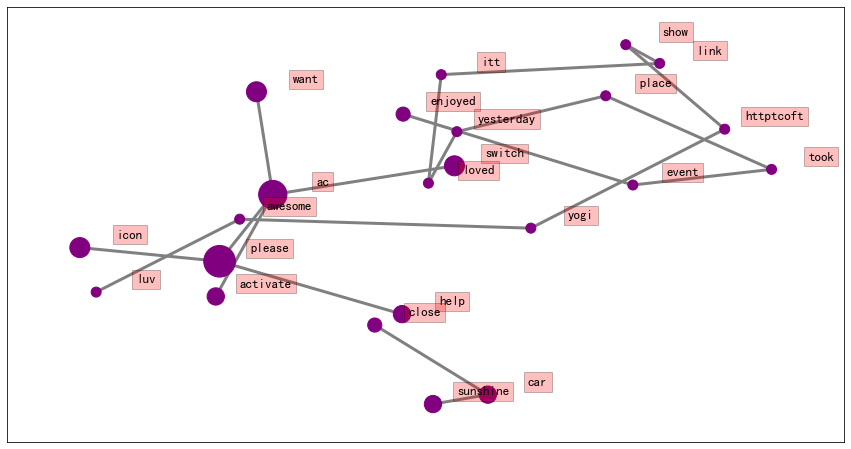

In [25]:
en_statistics.cooccurrence_network(en_word_list)

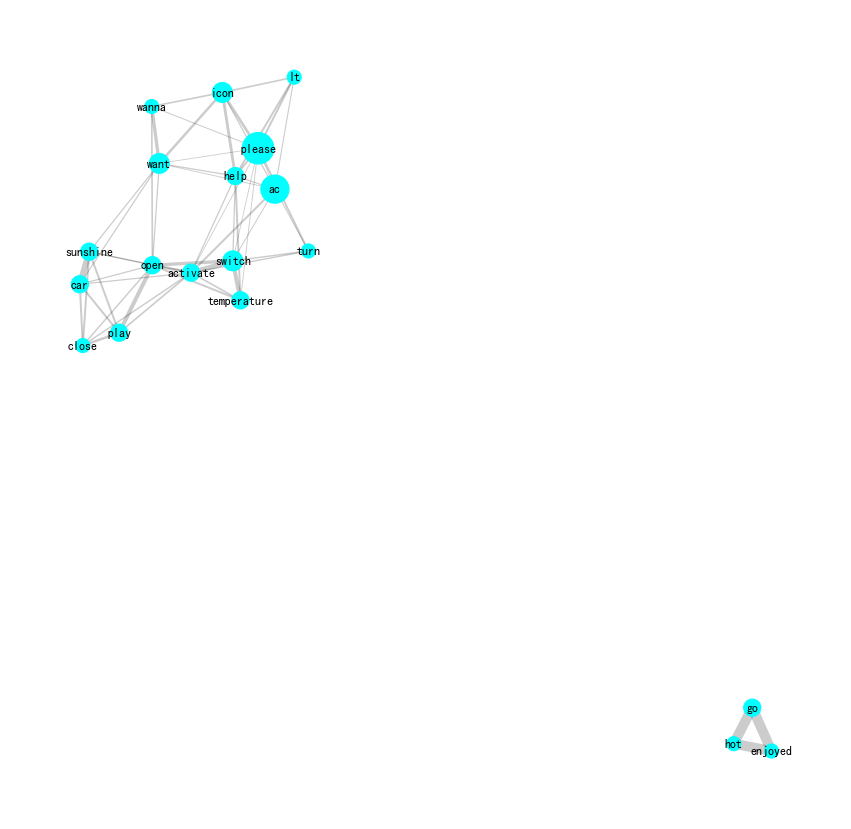

In [26]:
en_statistics.create_word_network(en_WordList_in_SentenceList,cnt=1)
#word_cnt是选出词频大于word_cnt的词语展示在图中，如果没有这个条件，所有词语在图中放不下且会有warnings
#后面共现词网络中的word_cnt参数同此处

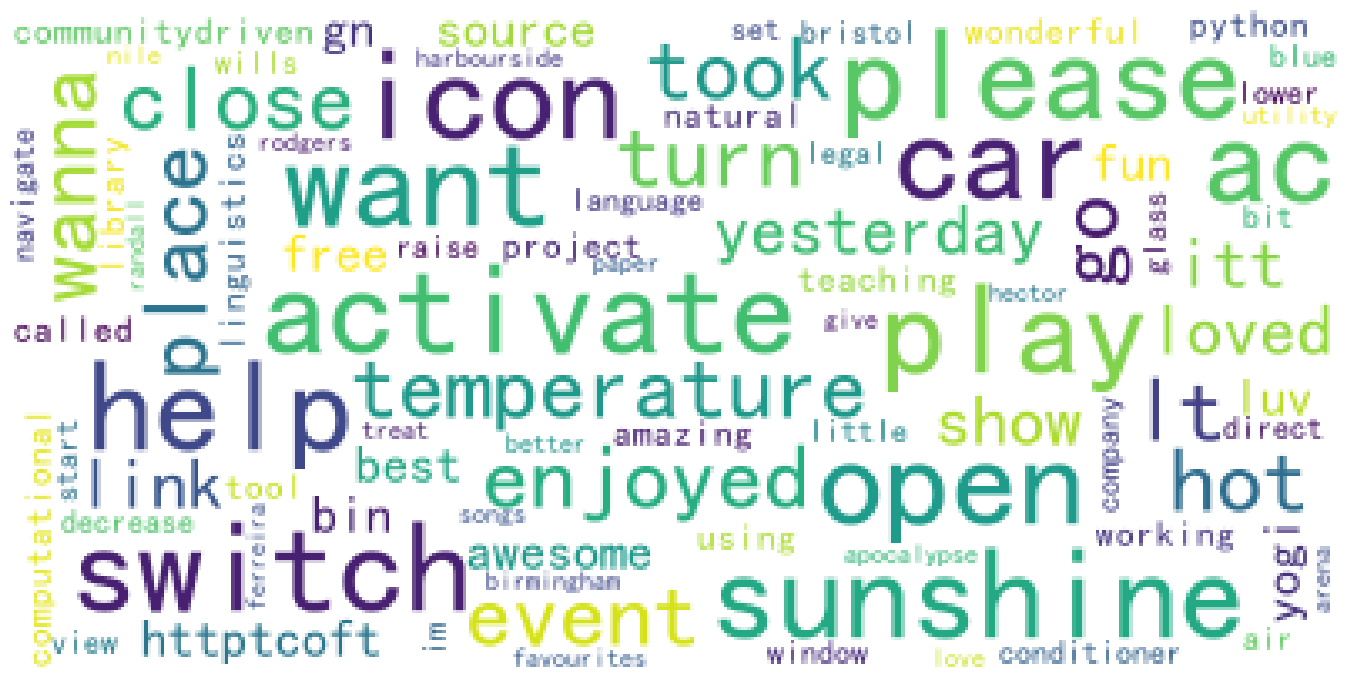

In [27]:
en_statistics.word_cloud(en_word_list,ifmask='no')
#ifmask默认为no, 则结果如下，若为‘yes’，则生成的词云形状由mask形状指定

In [28]:
from text_mining_model import lda_model

In [30]:
lda_model(en_word_list,result_save_name='c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\notebook\\en_lda_result.html',num_topics=7,passes=60,num_words=10)

0:
  "temperature" (0.102)
  "wanna" ( 0.070)
  "window" ( 0.037)
  "computational" ( 0.037)
  "source" ( 0.037)
  "linguistics" ( 0.037)
  "free" ( 0.037)
  "gn" ( 0.037)
  "air" ( 0.037)
  "working"( 0.037)
1:
  "icon" (0.127)
  "switch" ( 0.127)
  "apocalypse" ( 0.035)
  "best" ( 0.035)
  "communitydriven" ( 0.035)
  "fun" ( 0.035)
  "rodgers" ( 0.035)
  "give" ( 0.035)
  "treat" ( 0.035)
  "birmingham"( 0.035)
2:
  "please" (0.269)
  "help" ( 0.083)
  "close" ( 0.057)
  "luv" ( 0.030)
  "hector" ( 0.030)
  "nile" ( 0.030)
  "wonderful" ( 0.030)
  "blue" ( 0.030)
  "bin" ( 0.030)
  "better"( 0.030)
3:
  "open" (0.106)
  "activate" ( 0.106)
  "car" ( 0.106)
  "decrease" ( 0.038)
  "glass" ( 0.038)
  "legal" ( 0.038)
  "wills" ( 0.038)
  "teaching" ( 0.038)
  "language" ( 0.038)
  "songs"( 0.038)
4:
  "ac" (0.249)
  "lt" ( 0.066)
  "turn" ( 0.066)
  "enjoyed" ( 0.066)
  "yesterday" ( 0.035)
  "project" ( 0.035)
  "view" ( 0.035)
  "bit" ( 0.035)
  "place" ( 0.035)
  "favourites"( 0.03